In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/affiliate-urls-google.csv')
df

,original_url,final_url,domain,domain_category,source_page
0,https://aliclick.shop/r/c/1qwa0pzncer9pbv2,https://campaign.aliexpress.com/wow/gcp/ae/cha...,campaign.aliexpress.com,Shopping,https://www.youtube.com/watch?v=ejoA11qtTZU
1,https://aliclick.shop/r/c/1qwa0pzncer9pbv2,https://campaign.aliexpress.com/wow/gcp/ae/cha...,campaign.aliexpress.com,Shopping,https://www.youtube.com/watch?v=Al_EKm32S1Y
2,https://a.marsello.com/l/5e9a50be0880c00748709114,https://app.marsello.com/Portal/Custom/GetCoup...,app.marsello.com,Business,https://www.youtube.com/watch?v=fFehf1AP0u8
3,http://epngo.bz/cashback_index/44edb,https://backit.me/ru/cashback?inviter=44edb,backit.me,Business,https://www.youtube.com/channel/UCm_KSrfHLTh1C...
4,http://epngo.bz/cashback_index/44edb,https://backit.me/ru/cashback?inviter=44edb,backit.me,Business,https://www.youtube.com/watch?v=cbMm7VbvJbk
...,...,...,...,...,...
74123,https://amzn.to/3fJEpNb,https://www.amazon.com/Willow-Tree-hand-painte...,www.amazon.com,Shopping,https://www.ganjing.com/video/1fr4o61nres11q7t...
74124,https://amzn.to/42ZYlhN,https://www.amazon.com/gp/product/B095PF6219?i...,www.amazon.com,Shopping,https://www.youtube.com/watch?v=rz4Z5LpZBw8
74125,https://amzn.to/2OqPbYD,https://www.amazon.com/kindle-dbs/hz/subscribe...,www.amazon.com,Shopping,https://www.youtube.com/watch?v=cLPZJFwkCOk
74126,http://click.linksynergy.com/fs-bin/click?id=D...,https://click.linksynergy.com/fs-bin/click?id=...,click.linksynergy.com,Advertising,https://forums.somd.com/threads/overstock-com-...


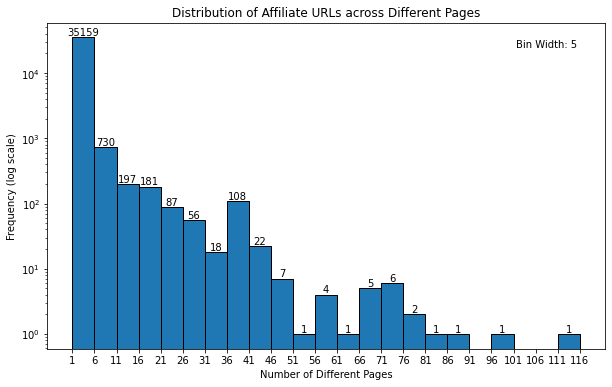

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# 按照 'original_url' 列分组并统计每组数据个数
grouped_by_url = df.groupby('original_url')['source_page'].nunique()

# 绘制 'original_url' 列的直方图
plt.figure(figsize=(10, 6))

# 计算直方图的bin数量和范围
bin_width = 5
num_bins = int((grouped_by_url.max() - grouped_by_url.min()) / bin_width) + 1
bins = np.arange(grouped_by_url.min(), grouped_by_url.max() + bin_width, bin_width)

# 绘制直方图
plt.hist(grouped_by_url, bins=bins, edgecolor='black')

plt.yscale('log')
plt.xlabel('Number of Different Pages')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Affiliate URLs across Different Pages')

# 计算并添加单位区间长度的文本标注
plt.text(0.95, 0.95, f'Bin Width: {bin_width}', ha='right', va='top', transform=plt.gca().transAxes)

# 添加子刻度（每隔五个刻度）
x_ticks = np.arange(grouped_by_url.min(), grouped_by_url.max() + bin_width, bin_width)
plt.xticks(x_ticks)

# 在每个柱子顶部添加数量标注
for i, count in enumerate(np.histogram(grouped_by_url, bins=bins)[0]):
    if count != 0:
        plt.text(bins[i] + bin_width/2, count, str(count), ha='center', va='bottom')

plt.show()

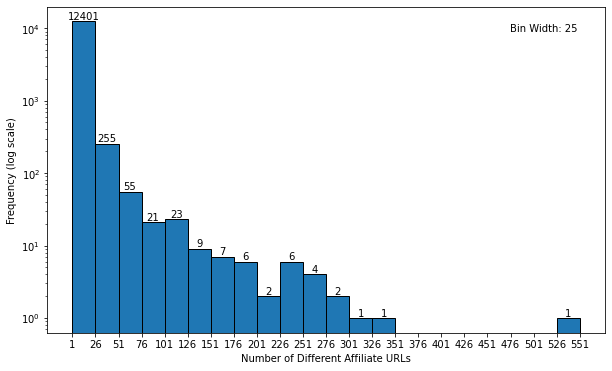

In [51]:
# 按照 'source_page' 列分组并统计每组数据个数
grouped_by_page = df.groupby('source_page')['original_url'].nunique()

# 绘制 'source_page' 列的直方图
plt.figure(figsize=(10, 6))

# 计算直方图的bin数量和范围
bin_width = 25
num_bins = int((grouped_by_page.max() - grouped_by_page.min()) / bin_width) + 1
bins = np.arange(grouped_by_page.min(), grouped_by_page.max() + bin_width, bin_width)

plt.hist(grouped_by_page, bins=bins, edgecolor='black')

plt.yscale('log')
plt.xlabel('Number of Different Affiliate URLs')
plt.ylabel('Frequency (log scale)')
# plt.title('Distribution of Different Affiliate URLs within Pages')

# 计算并添加单位区间长度的文本标注
plt.text(0.95, 0.95, f'Bin Width: {bin_width}', ha='right', va='top', transform=plt.gca().transAxes)

# 添加子刻度（每隔十个刻度）
x_ticks = np.arange(grouped_by_page.min(), grouped_by_page.max() + bin_width, bin_width)
plt.xticks(x_ticks)

# 在每个柱子顶部添加数量标注
for i, count in enumerate(np.histogram(grouped_by_page, bins=bins)[0]):
    if count != 0:
        plt.text(bins[i] + bin_width/2, count, str(count), ha='center', va='bottom')

plt.show()

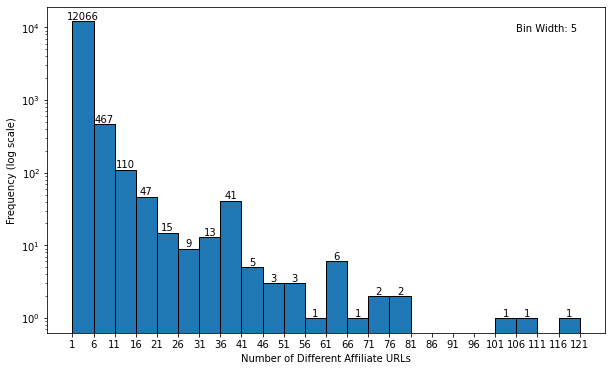

In [52]:
# 按照 'source_page' 列分组并统计每组数据个数
grouped_by_page = df.groupby('source_page')['domain'].nunique()

# 绘制 'source_page' 列的直方图
plt.figure(figsize=(10, 6))

# 计算直方图的bin数量和范围
bin_width = 5
num_bins = int((grouped_by_page.max() - grouped_by_page.min()) / bin_width) + 1
bins = np.arange(grouped_by_page.min(), grouped_by_page.max() + bin_width, bin_width)

plt.hist(grouped_by_page, bins=bins, edgecolor='black')

plt.yscale('log')
plt.xlabel('Number of Different Affiliate URLs')
plt.ylabel('Frequency (log scale)')
# plt.title('Distribution of Different Domains within Pages')

# 计算并添加单位区间长度的文本标注
plt.text(0.95, 0.95, f'Bin Width: {bin_width}', ha='right', va='top', transform=plt.gca().transAxes)

# 添加子刻度（每隔十个刻度）
x_ticks = np.arange(grouped_by_page.min(), grouped_by_page.max() + bin_width, bin_width)
plt.xticks(x_ticks)

for i, count in enumerate(np.histogram(grouped_by_page, bins=bins)[0]):
    if count != 0:
        plt.text(bins[i] + bin_width/2, count, str(count), ha='center', va='bottom')

plt.show()